# Prueba técnica Colombina
## Juan David Diaz Mutis

### Contexto 

Aunque para las compañías es muy importante conseguir nuevos clientes, también es importante retener a sus clientes actuales. Un modelo de predicción de fuga permite a través de los datos recolectados como frecuencia de compras, cantidad de productos comprados, valor de compra, entre otros; anticipar qué clientes pueden continuar o dejar una compañía. Así, realizar cambios proactivos en sus esfuerzos de retención que reducen las tasas de abandono.

Colombina está interesado en saber qué clientes tienen mayor probabilidad de no volver a comprar ninguno de sus productos. El negocio ha establecido que un cliente que no compra durante 2 meses es un cliente fugado.

### Task 

Construya un modelo estadístico, Machine Learning o Deep Learning para predecir clientesfugados.

### Variables

Doc_vtas: Id de pedido

Fecha: Fecha del pedido

Solic: Código del cliente

Material: Id del producto solicitado

Cnt_uni: Cantidad pedida en unidad venta

sect_mat: código del sector del producto

Cnt_cart: Cantidad pedidos en unidad cartón

ValN_Pos: Valor neto en dinero

Moneda: Moneda

# Importar librerías

In [92]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install catboost

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from pyspark.sql import DataFrame
from pyspark.sql import functions as sf
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import *
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from catboost import CatBoostClassifier, Pool
#from catboost_spark import CatBoostClassifier as CatBoostClassifierSpark

#from catboost_spark import Pool as PoolSpark

# Cargar datos

In [95]:
df = pd.read_csv('C:/Users/Usuario/Documents/Prueba Colombina/prueba_DS.txt')
df.head(5)

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000,347.76,COP
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000,781.40,COP
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000,309.05,COP
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375,124.59,COP
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000,478.87,COP


In [96]:
# Cantidad de filas y columnas
df.shape

(12559901, 9)

# Limpieza de datos

### Cantidad de datos nulos por variable

In [97]:
df.isnull().sum()

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

No existen datos nulos para alguna de las variables

### Revisión de la calidad del dato de cada variable

In [98]:
pd.set_option('display.max_rows', 10000)

#### Fecha del pedido

In [99]:
# Información sobre fechas
gb_Fecha = df.groupby(df['Fecha']).size()
gb_Fecha

Fecha
2021-11-01     5825
2021-11-02    65978
2021-11-03    60761
2021-11-04    63506
2021-11-05    58053
2021-11-06    56315
2021-11-07      809
2021-11-08    68242
2021-11-09    55554
2021-11-10    54208
2021-11-11    55354
2021-11-12    52318
2021-11-13    49732
2021-11-14      469
2021-11-15    47028
2021-11-16    59773
2021-11-17    56610
2021-11-18    57388
2021-11-19    57085
2021-11-20    52759
2021-11-21      885
2021-11-22    59734
2021-11-23    56174
2021-11-24    53285
2021-11-25    53556
2021-11-26    53888
2021-11-27    52819
2021-11-28      931
2021-11-29    56746
2021-11-30    60506
2021-12-01    60236
2021-12-02    63825
2021-12-03    68892
2021-12-04    59813
2021-12-05     9226
2021-12-06    58068
2021-12-07    56243
2021-12-08    42769
2021-12-09    64055
2021-12-10    58922
2021-12-11    59704
2021-12-12     1345
2021-12-13    64219
2021-12-14    66482
2021-12-15    66870
2021-12-16    61814
2021-12-17    62272
2021-12-18    69770
2021-12-19     8171
2021-12-20    

No se encontró alguna fecha de pedido inconsistente

#### Material

In [100]:
# Información sobre material
gb_Material = df.groupby(df['Material']).size()
gb_Material

Material
294          35
296      249509
344       12984
352        9029
354      217009
436      134887
496       48478
560         412
762        7582
802           5
820       92296
1078      22867
1130       9628
1246     118253
1260       6407
1324      68510
1384     118299
1594          2
1606       3676
1652          1
1714         39
1920        292
1944      17227
2122      81928
2256       1252
2458      90338
2460       2364
2484      93328
2658      24557
2770         20
2804      14649
2856       1504
2858      46302
2918      10560
3338       1289
3362      16173
3366       1735
3454        550
3504         13
3506          4
3802       3869
4014       5526
4190      72736
4192       4454
4196      57508
4212        327
4218      23437
4220      14252
4242          1
4310          1
4348       1061
4382     325710
4384      43428
4386       4477
4388      53230
4390       3325
4446          1
4520         22
4668       3284
4776          7
4958       1338
4960          2

#### Cantidad vendida en unidad de venta 

count    1.255990e+07
mean     3.444836e+00
std      3.343890e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.000000e+05
Name: Cnt_uni, dtype: float64

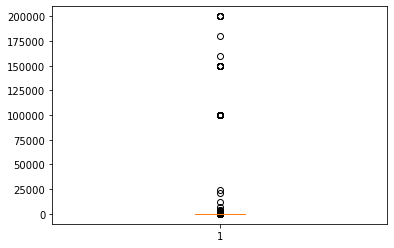

In [101]:
# Boxplot cantidad vendida de unidades
plt.boxplot(df['Cnt_uni'])
df['Cnt_uni'].describe()

Por presencia de outliers y al no poseer información sobre la posibilidad de tener estas cantidades de unidades vendidas tan altas, se excluirán los registros usando el rango intercuartílico, es decir, las observaciones mayores a Q3 + 1.5 * IQR 

In [102]:
# Definir rango intercuartílico
Q1 = df.Cnt_uni.quantile (q = .25)
Q3 = df.Cnt_uni.quantile (q = .75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

# Eliminar las filas que tengan valores de Cnt_uni por fuera de 1.5 * IQR de Q1 y Q3
df_clean = df[~ ((df.Cnt_uni<(Q1-1.5 * IQR)) | (df.Cnt_uni> (Q3 + 1.5 * IQR)))]
df_clean.shape

1.0
3.0
2.0


(11918105, 9)

In [103]:
# Filas eliminadas
df.shape[0] - df_clean.shape[0]

641796

Fueron eliminadas 641.796 filas las cuales fueron consideradas como outliers en la variable Cnt_uni. El siguiente boxplot muestra la dispersión de los datos habiendo eliminado los outliers.

count    1.191810e+07
mean     1.906160e+00
std      1.527819e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: Cnt_uni, dtype: float64

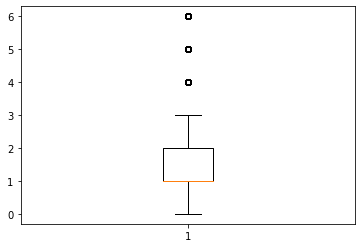

In [104]:
plt.boxplot(df_clean['Cnt_uni'])
df_clean['Cnt_uni'].describe()

A pesar de que en el boxplot se observa tres outliers, podrían ser valores posibles. 

#### Cantidad pedidos en unidad cartón 

count    1.191810e+07
mean     1.358736e-01
std      2.719838e-01
min      0.000000e+00
25%      5.555600e-02
50%      6.666700e-02
75%      1.250000e-01
max      6.000000e+00
Name: Cnt_cart, dtype: float64

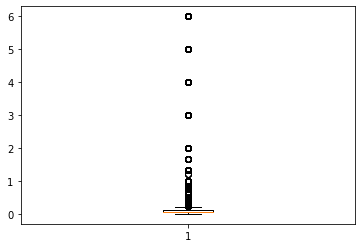

In [105]:
# Boxplot Cantidad pedidos en unidad cartón
plt.boxplot(df_clean['Cnt_cart'])
df_clean['Cnt_cart'].describe()

Si bien se observa outliers en el boxplot, no se excluyen debido a que no representan cantidades tan altas como en la anterior variable.

#### Valor neto en dinero

count    1.191810e+07
mean     8.081999e+01
std      1.467081e+02
min      0.000000e+00
25%      3.936000e+01
50%      5.282000e+01
75%      7.981000e+01
max      1.458340e+04
Name: ValN_Pos, dtype: float64

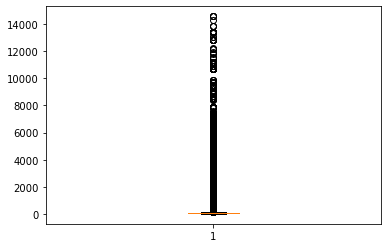

In [106]:
# Boxplot Valor neto en dinero
plt.boxplot(df_clean['ValN_Pos'])
df_clean['ValN_Pos'].describe()

In [107]:
# Definir rango intercuartílico
Q1 = df_clean.ValN_Pos.quantile (q = .25)
Q3 = df_clean.ValN_Pos.quantile (q = .75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

# Eliminar las filas que tengan valores de Cnt_uni por fuera de 1.5 * IQR de Q1 y Q3
df_clean = df_clean[~ ((df_clean.ValN_Pos<(Q1-1.5 * IQR)) | (df_clean.ValN_Pos> (Q3 + 1.5 * IQR)))]
df_clean.shape

39.36
79.81
40.45


(10755495, 9)

count    1.075550e+07
mean     5.556075e+01
std      2.615313e+01
min      0.000000e+00
25%      3.781000e+01
50%      5.124000e+01
75%      6.548000e+01
max      1.404700e+02
Name: ValN_Pos, dtype: float64

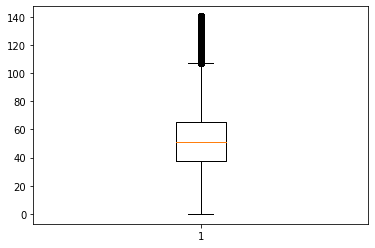

In [108]:
plt.boxplot(df_clean['ValN_Pos'])
df_clean['ValN_Pos'].describe()

#### Moneda 

In [109]:
# Información sobre moneda
gb_Moneda = df_clean.groupby(df_clean['Moneda']).size()
gb_Moneda

Moneda
COP    10755495
dtype: int64

No existe una moneda diferente a COP

Se trabajará con la base de datos con 10755495 registros.

## Construcción variable de respuesta 

El negocio ha establecido que un cliente que no compra durante 2 meses es un cliente fugado.

Se identificará por id del cliente, cuáles de ellos no han realizado una nueva compra utilizando la fecha de su última compra y la fecha del día de hoy. Se identificará aquellos que tengan una diferencia de 60 días.

Primero se extrae las variables Solic y Fecha de la base de datos

In [110]:
df_fuga = df_clean[['Solic','Fecha']]
df_fuga.Fecha = pd.to_datetime(df_fuga.Fecha, format='%Y/%m/%d')
df_fuga.dtypes

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Solic             int64
Fecha    datetime64[ns]
dtype: object

Se crea dos columnas, uno con la fecha de la última compra (por lo pronto se utilizará la fecha de cada registro) y la fecha de hoy.

In [111]:
df_fuga['Fecha_UltimaCompra'] = df_fuga['Fecha']
now = datetime.now()
df_fuga['Fecha_Hoy'] = now.date()
df_fuga.Fecha_Hoy = pd.to_datetime(df_fuga.Fecha_Hoy, format='%Y/%m/%d')
df_fuga

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9192/3631858173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuga['Fecha_UltimaCompra'] = df_fuga['Fecha']
C:\Users\Usuario\AppData\Local\Temp/ipykernel_9192/3631858173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuga['Fecha_Hoy'] = now.date()


,Solic,Fecha,Fecha_UltimaCompra,Fecha_Hoy
20,1418940,2021-11-01,2021-11-01,2022-07-17
43,18050322,2021-11-01,2021-11-01,2022-07-17
44,18050322,2021-11-01,2021-11-01,2022-07-17
45,18050322,2021-11-01,2021-11-01,2022-07-17
46,18050322,2021-11-01,2021-11-01,2022-07-17
...,...,...,...,...
12559896,1183780,2022-04-08,2022-04-08,2022-07-17
12559897,1183780,2022-04-08,2022-04-08,2022-07-17
12559898,1183780,2022-04-08,2022-04-08,2022-07-17
12559899,1183780,2022-04-08,2022-04-08,2022-07-17


Se realiza un groupby por Solic, y se identifica la fecha de su última compra y la fecha de hoy, así como la diferencia en días entre estas dos fechas.

In [112]:
gb_fuga= df_fuga.groupby('Solic').agg({'Fecha_UltimaCompra': lambda x: x.max(),
                                     'Fecha_Hoy': lambda x: x.max()}).reset_index()
gb_fuga

,Solic,Fecha_UltimaCompra,Fecha_Hoy
0,49128,2022-07-11,2022-07-17
1,69792,2022-07-05,2022-07-17
2,69838,2022-07-12,2022-07-17
3,69868,2022-07-05,2022-07-17
4,70334,2022-05-31,2022-07-17
...,...,...,...
79810,18179654,2022-07-14,2022-07-17
79811,18179660,2022-07-15,2022-07-17
79812,18179662,2022-07-14,2022-07-17
79813,18179664,2022-07-14,2022-07-17


In [113]:
gb_fuga['DiffDias'] = (gb_fuga['Fecha_Hoy']-gb_fuga['Fecha_UltimaCompra']).dt.days


Se identifica aquellos registros con una diferencia en días de 60 o más.

In [114]:
gb_fuga_2 = gb_fuga[gb_fuga.DiffDias>=60].reset_index(drop=True)
gb_fuga_2

,Solic,Fecha_UltimaCompra,Fecha_Hoy,DiffDias
0,73274,2022-04-30,2022-07-17,78
1,77452,2022-03-08,2022-07-17,131
2,78236,2022-03-22,2022-07-17,117
3,78256,2022-05-17,2022-07-17,61
4,78284,2022-04-19,2022-07-17,89
...,...,...,...,...
10970,18169652,2022-05-17,2022-07-17,61
10971,18169750,2022-05-16,2022-07-17,62
10972,18169968,2022-05-18,2022-07-17,60
10973,18169970,2022-05-18,2022-07-17,60


Se crea una llave entre Solic y Fecha de la última compra para identificar en la base aquellos clientes fugados.

In [115]:
gb_fuga_2['Llave'] = gb_fuga_2['Solic'].map(str) + gb_fuga_2['Fecha_UltimaCompra'].map(str)
gb_fuga_2['Llave'] = gb_fuga_2['Llave'].apply(lambda x: x.split(' ')[0])
gb_fuga_2['Fuga'] = 1
gb_fuga_2

,Solic,Fecha_UltimaCompra,Fecha_Hoy,DiffDias,Llave,Fuga
0,73274,2022-04-30,2022-07-17,78,732742022-04-30,1
1,77452,2022-03-08,2022-07-17,131,774522022-03-08,1
2,78236,2022-03-22,2022-07-17,117,782362022-03-22,1
3,78256,2022-05-17,2022-07-17,61,782562022-05-17,1
4,78284,2022-04-19,2022-07-17,89,782842022-04-19,1
...,...,...,...,...,...,...
10970,18169652,2022-05-17,2022-07-17,61,181696522022-05-17,1
10971,18169750,2022-05-16,2022-07-17,62,181697502022-05-16,1
10972,18169968,2022-05-18,2022-07-17,60,181699682022-05-18,1
10973,18169970,2022-05-18,2022-07-17,60,181699702022-05-18,1


La misma llave se crea en la base de datos principal

In [116]:
df_clean['Llave'] = df_clean['Solic'].map(str) + df_clean['Fecha'].map(str)
df_clean

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,Llave
20,7503277851,2021-11-01,1418940,24986,2.0,36,0.083333,90.20,COP,14189402021-11-01
43,7503277853,2021-11-01,18050322,5128,2.0,66,0.111111,87.96,COP,180503222021-11-01
44,7503277853,2021-11-01,18050322,1246,1.0,66,0.055556,43.98,COP,180503222021-11-01
45,7503277853,2021-11-01,18050322,40272,1.0,66,0.041667,46.09,COP,180503222021-11-01
46,7503277853,2021-11-01,18050322,26662,1.0,108,0.007937,0.01,COP,180503222021-11-01
...,...,...,...,...,...,...,...,...,...,...
12559896,7504718894,2022-04-08,1183780,54278,1.0,60,0.041667,35.74,COP,11837802022-04-08
12559897,7504718894,2022-04-08,1183780,54302,1.0,60,0.041667,44.40,COP,11837802022-04-08
12559898,7504718894,2022-04-08,1183780,54298,1.0,60,0.041667,44.40,COP,11837802022-04-08
12559899,7504718894,2022-04-08,1183780,24976,1.0,36,0.083333,80.67,COP,11837802022-04-08


Se cruzan las dos bases por la llave para traer la información de fuga

In [117]:
df_clean_fuga = pd.merge(df_clean, gb_fuga_2, how="left", on=["Llave"])
df_clean_fuga['Fuga'] = df_clean_fuga['Fuga'].fillna(0)
df_clean_fuga

,Doc_vtas,Fecha,Solic_x,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,Llave,Solic_y,Fecha_UltimaCompra,Fecha_Hoy,DiffDias,Fuga
0,7503277851,2021-11-01,1418940,24986,2.0,36,0.083333,90.20,COP,14189402021-11-01,NaN,NaT,NaT,NaN,0.0
1,7503277853,2021-11-01,18050322,5128,2.0,66,0.111111,87.96,COP,180503222021-11-01,NaN,NaT,NaT,NaN,0.0
2,7503277853,2021-11-01,18050322,1246,1.0,66,0.055556,43.98,COP,180503222021-11-01,NaN,NaT,NaT,NaN,0.0
3,7503277853,2021-11-01,18050322,40272,1.0,66,0.041667,46.09,COP,180503222021-11-01,NaN,NaT,NaT,NaN,0.0
4,7503277853,2021-11-01,18050322,26662,1.0,108,0.007937,0.01,COP,180503222021-11-01,NaN,NaT,NaT,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755490,7504718894,2022-04-08,1183780,54278,1.0,60,0.041667,35.74,COP,11837802022-04-08,NaN,NaT,NaT,NaN,0.0
10755491,7504718894,2022-04-08,1183780,54302,1.0,60,0.041667,44.40,COP,11837802022-04-08,NaN,NaT,NaT,NaN,0.0
10755492,7504718894,2022-04-08,1183780,54298,1.0,60,0.041667,44.40,COP,11837802022-04-08,NaN,NaT,NaT,NaN,0.0
10755493,7504718894,2022-04-08,1183780,24976,1.0,36,0.083333,80.67,COP,11837802022-04-08,NaN,NaT,NaT,NaN,0.0


Al realizar el merge, se identifican los siguientes datos para fuga. 

In [118]:
df_clean_fuga['Fuga'].value_counts()

0.0    10688156
1.0       67339
Name: Fuga, dtype: int64

Se realiza verificación de que el merge se haya realizado correctamente.

In [119]:
df_clean_fuga[df_clean_fuga['Llave']=='732742022-04-30']

,Doc_vtas,Fecha,Solic_x,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,Llave,Solic_y,Fecha_UltimaCompra,Fecha_Hoy,DiffDias,Fuga
9202681,7504919735,2022-04-30,73274,44858,1.0,30,0.066667,51.24,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0
9202682,7504919735,2022-04-30,73274,17818,1.0,30,0.066667,51.24,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0
9202683,7504919735,2022-04-30,73274,48514,1.0,30,0.066667,51.24,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0
9202684,7504919735,2022-04-30,73274,56236,1.0,30,0.066667,51.24,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0
9202685,7504919735,2022-04-30,73274,15988,1.0,30,0.066667,51.22,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0
9202686,7504919735,2022-04-30,73274,55384,1.0,60,0.033333,25.74,COP,732742022-04-30,73274.0,2022-04-30,2022-07-17,78.0,1.0


## Análisis descriptivo de los datos 

Se seleccionan las columnas que serán utilizadas

In [120]:
df_clean_fuga = df_clean_fuga[['Doc_vtas', 'Fecha', 'Solic_x', 'Material', 'Cnt_uni', 'sect_mat','Cnt_cart', 'ValN_Pos', 'Moneda', 'Fuga']]
df_clean_fuga.head()

,Doc_vtas,Fecha,Solic_x,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,Fuga
0,7503277851,2021-11-01,1418940,24986,2.0,36,0.083333,90.20,COP,0.0
1,7503277853,2021-11-01,18050322,5128,2.0,66,0.111111,87.96,COP,0.0
2,7503277853,2021-11-01,18050322,1246,1.0,66,0.055556,43.98,COP,0.0
3,7503277853,2021-11-01,18050322,40272,1.0,66,0.041667,46.09,COP,0.0
4,7503277853,2021-11-01,18050322,26662,1.0,108,0.007937,0.01,COP,0.0


### Porcentaje de clientes fugados 

Si se considera el total de registros de la base,  el porcentaje de registros de clientes fugados son los siguientes:

In [121]:
df_clean_fuga.groupby('Fuga').size().sort_values(ascending=False)

Fuga
0.0    10688156
1.0       67339
dtype: int64

In [122]:
(df_clean_fuga.groupby('Fuga').size().sort_values(ascending=False) / df_clean_fuga.groupby('Fuga').size().sort_values(ascending=False).sum())*100

Fuga
0.0    99.373911
1.0     0.626089
dtype: float64

Del total de registros, el 0.62% corresponde a clientes fugados.

Ahora, si consideramos registros únicos, las cifras son las siguientes:

In [123]:
df_clean_fuga_sinduplic = df_clean_fuga.drop_duplicates(subset ="Solic_x")
df_clean_fuga_sinduplic.shape

(79815, 10)

In [124]:
df_clean_fuga_sinduplic.groupby('Fuga').size().sort_values(ascending=False)

Fuga
0.0    76628
1.0     3187
dtype: int64

In [125]:
(df_clean_fuga_sinduplic.groupby('Fuga').size().sort_values(ascending=False) / df_clean_fuga_sinduplic.groupby('Fuga').size().sort_values(ascending=False).sum())*100

Fuga
0.0    96.007016
1.0     3.992984
dtype: float64

El porcentaje de clientes fugados es de aproximadamente 4%

### Producto solicitado según Fuga

Se realiza análisis de producto solicitado y fuga

In [126]:
gb_FugaMaterial = pd.crosstab(index=df_clean_fuga['Material'],columns=df_clean_fuga['Fuga'], margins=True,normalize='index')
gb_FugaMaterial = gb_FugaMaterial.reset_index()
gb_FugaMaterial

Fuga,Material,0.0,1.0
0,294,1.000000,0.000000
1,296,0.993178,0.006822
2,344,0.994773,0.005227
3,352,0.998266,0.001734
4,354,0.992564,0.007436
5,436,0.993128,0.006872
6,496,0.992310,0.007690
7,560,0.994624,0.005376
8,762,0.995085,0.004915
9,802,1.000000,0.000000


In [127]:
gb_FugaMaterial.columns = ['Material','NoFuga','Fuga']

In [128]:
gb_FugaMaterial.sort_values(by="Fuga",ascending=False)

,Material,NoFuga,Fuga
345,25136,0.000000,1.000000
19,1652,0.000000,1.000000
751,55928,0.500000,0.500000
438,26604,0.931034,0.068966
408,26364,0.941176,0.058824
265,16746,0.944444,0.055556
187,11870,0.956522,0.043478
62,5168,0.968000,0.032000
188,11910,0.968750,0.031250
594,27754,0.969697,0.030303


De este análisis se puede observar que el 100% de los clientes que solicitan los productos con id 25136 y 1652 presentan fuga.

### Cantidad pedida en unidad de venta según fuga

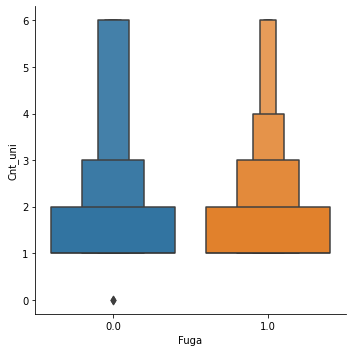

In [129]:
df_clean_fuga.groupby('Fuga')[('Cnt_uni')].describe()
g = sns.catplot(x = 'Fuga', y = "Cnt_uni", data=df_clean_fuga, kind="boxen")
g.set_axis_labels("Fuga", "Cnt_uni");

No se observa un comportamiento particular entre la cantidad pedida en unidad de venta y la fuga de clientes.

### Sector del producto según fuga

In [130]:
gb_Fugasect_mat = pd.crosstab(index=df_clean_fuga['sect_mat'],columns=df_clean_fuga['Fuga'], margins=True,normalize='index')
gb_Fugasect_mat = gb_Fugasect_mat.reset_index()
gb_Fugasect_mat

Fuga,sect_mat,0.0,1.0
0,30,0.993383,0.006617
1,36,0.993493,0.006507
2,39,1.000000,0.000000
3,42,0.995831,0.004169
4,48,0.993430,0.006570
5,51,0.990537,0.009463
6,54,0.994251,0.005749
7,60,0.993372,0.006628
8,63,0.992191,0.007809
9,66,0.993632,0.006368


No se observa un comportamiento particulr entre sector del producto y la fuga de clientes.

### Cantidad pedida en unidad de cartón según fuga 

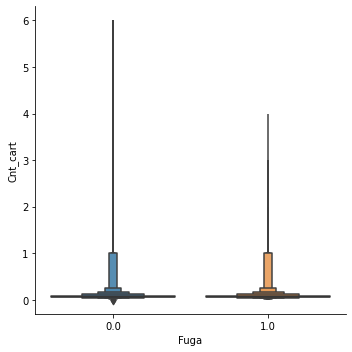

In [131]:
df_clean_fuga.groupby('Fuga')[('Cnt_cart')].describe()
g = sns.catplot(x = 'Fuga', y = "Cnt_cart", data=df_clean_fuga, kind="boxen")
g.set_axis_labels("Fuga", "Cnt_cart");

No se observa un comportamiento particular entre cantidad pedida en unidad de cartón y la fuga de clientes.

### Valor neto en dinero según fuga 

,count,mean,std,min,25%,50%,75%,max
Fuga,,,,,,,,
0.0,10688156.0,55.572083,26.155086,0.0,37.81,51.24,65.68,140.47
1.0,67339.0,53.762462,25.777707,0.0,37.02,51.06,60.24,140.47


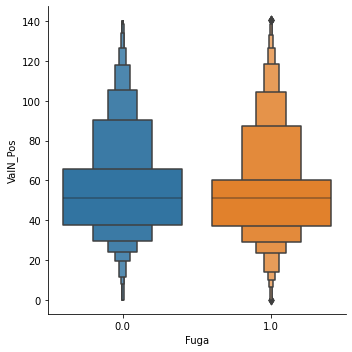

In [132]:
g = sns.catplot(x = 'Fuga', y = "ValN_Pos", data=df_clean_fuga, kind="boxen")
g.set_axis_labels("Fuga", "ValN_Pos");
df_clean_fuga.groupby('Fuga')[('ValN_Pos')].describe()

No se observa un comportamiento particular entre valor neto en dinero y la fuga de clientes.

## Preparación datos para el modelo 

Se define las covariables y variable de respuesta. Las covariables de naturaleza cualitativa son definidas como dummies para ingresarlas al modelo

In [134]:
X = df_clean_fuga[['Cnt_uni','Cnt_cart','ValN_Pos']]
y = df_clean_fuga['Fuga']
X_dummies = df_clean_fuga[['Material','sect_mat']] 
X_dummies['Material']= X_dummies['Material'].astype('str')
X_dummies['sect_mat']= X_dummies['sect_mat'].astype('str')
X2 = pd.get_dummies(X_dummies)
X3 = pd.concat([X, X2], axis=1)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9192/2961656940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dummies['Material']= X_dummies['Material'].astype('str')
C:\Users\Usuario\AppData\Local\Temp/ipykernel_9192/2961656940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dummies['sect_mat']= X_dummies['sect_mat'].astype('str')


MemoryError: Unable to allocate 7.58 GiB for an array with shape (757, 10755495) and data type uint8

In [ ]:
X3

In [140]:
# Import libraries
import pandas as pd
from pyspark.sql import Row
from pyspark.sql import SparkSession
 
 
# Create a session
spark = SparkSession.builder.getOrCreate()

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

Se realiza la separación de los datos para train y test del modelo, de modo que en la separación se considere la misma proporción de fuga (stratify)

In [138]:
train_split, test_split = df_clean_fuga.randomSplit(weights = [0.80, 0.20], seed = 13)

AttributeError: 'DataFrame' object has no attribute 'randomSplit'

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X3,y,shuffle=True, random_state = 123,stratify=y)

Se realizará la regularización de las covariables

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelos 

Se ajustarán los modelos: regresión logística, KNN, Naive Bayes, árbol de decisión, random forest, xgboost. y se seleccionará el mejor según el accuracy y el recall

### Regresión logística 

In [ ]:
modelLR = LogisticRegression()

In [ ]:
modelLR.fit(X_train,y_train)

In [ ]:
y_pred_proba_model_train = modelLR.predict_proba(X_train_scaled)[:,1]
y_pred_model_train = modelLR.predict(X_train_scaled)

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_model_train),annot=True,fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [ ]:
def _plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    #fmt = '4d' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True Class', fontsize = 14)
    plt.xlabel('Predicted Class', fontsize = 14)

    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    
def _threshold_finder(model, X, y_true):
    """
    a function to find the optimal threshold for binary classification
    model: a trained model object (such as xgboost, glmnet, ...)
    X: the test set of features (pandas dataframe or numpy array)
    y_true: the true class labels (list or array of 0's and 1's)    
    """
    
    y_predict_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba)
    auc = roc_auc_score(y_true, y_predict_proba)
    precision, recall, thresholds2 = precision_recall_curve(y_true, y_predict_proba)
    
    class_names = [0, 1]
    youden_idx = np.argmax(np.abs(tpr - fpr))
    youden_threshold = thresholds[youden_idx]
    y_pred_youden = (y_predict_proba > youden_threshold).astype(int)
    cnf_matrix = confusion_matrix(y_true, y_pred_youden)
    np.set_printoptions(precision=2)
    
    f1 = []
    for i in range(len(precision)):
        f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
        
    queue_rate = []
    for thr in thresholds2:
        queue_rate.append((y_predict_proba >= thr).mean()) 

    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color = "red", label = F"AUC = {auc:.3f}")
    plt.plot(fpr[youden_idx], tpr[youden_idx], marker = "o", color = "navy", ms =10, label =F"Youden Threshold = {youden_threshold:.2f}" )
    plt.axvline(x = fpr[youden_idx], ymin = fpr[youden_idx], ymax = tpr[youden_idx], color = "navy", ls = "--")
    plt.plot([0,1], [0,1] , color = "black", ls = "--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('1 - Specificity' , fontsize=12)
    plt.ylabel('Sensitivity' , fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend( prop={'size':12} , loc = 4)

    plt.subplot(1,2,2)
    _plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, cmap=plt.cm.Reds, title = F"Youden Threshold = {youden_threshold:.2f}\nAccuracy = {accuracy_score(y_true, y_pred_youden)*100:.2f}%")
    plt.show()
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1,2,1)
    plt.plot(thresholds, 1-fpr, label = "1 - Specificity")
    plt.plot(thresholds, tpr, label = "Sensitivity")
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds[np.argmin(abs(tpr + fpr - 1))]+0.2])
    plt.axvline(thresholds[np.argmin(abs(tpr + fpr - 1))], color="k", ls = "--")
    plt.title(F"Threshold = {thresholds[np.argmin(abs(tpr + fpr - 1))]:.3f}", fontsize = 12)
    
    plt.subplot(1,2,2)
    plt.plot(thresholds2, precision[1:], label = "Precision")
    plt.plot(thresholds2, recall[1:], label = "Recall")
    plt.plot(thresholds2, f1[1:], label = "F1-Score")
    plt.plot(thresholds2, queue_rate, label = "Queue Rate")
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds2[np.argmin(abs(precision-recall))] + 0.2])
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.axvline(thresholds2[np.argmin(abs(precision-recall))], color="k", ls = "--")
    plt.title(label = F"Threshold = {thresholds2[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
    plt.show()

In [ ]:
_threshold_finder(modelLR, X_train_scaled , y_train)

In [ ]:
# Nueva clasificación según nuevo umbral
umbral = 0.01
probs = modelLR.predict_proba(X_test_scaled)[:,1]
y_test_pred_model = probs > umbral

In [ ]:
# Nueva matriz de confusión
confusion_matrix(y_test, y_test_pred_model)
sns.heatmap(confusion_matrix(y_test, y_test_pred_model), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [ ]:
# Accuracy de modelo con set de prueba
print('Accuracy en el set de Test: {:.2f}'
     .format(round(accuracy_score(y_test, y_test_pred_model), 2)))

# Recall de modelo con set de prueba
print('Recall en el set de Test: {:.2f}'
     .format(round(recall_score(y_test, y_test_pred_model), 2)))

### XGBOOST

In [ ]:
xgb_model = XGBClassifier(random_state=123)

In [ ]:
params = {  
    "n_estimators": [500,550,600],      # Number of boosted trees to fit.
    "max_depth": [3,4,5],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [ ]:
xgb_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_XGBoost = xgb_model.predict(X_test_scaled)

In [ ]:
scorexgb = accuracy_score(y_test, y_pred_XGBoost)
recallxgb = recall_score(y_test, y_pred_XGBoost)
print(scorexgb)
print(recallxgb)